# Plot Parameter Landscape 

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as snb 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from model import LogisticRegression
from removal_algorithm import plot_weight_trace
snb.set_theme()
snb.set(font_scale=1.5)
import pickle 


Set parameters and define helper functions 

In [2]:
def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

gamma = 0.25
lam = 0.1
delta = 1e-4
m = 10
eps = 1e1
sigma = 0.1 

sigmoid = lambda x : 1/(1 + np.exp(-x) + 1e-9)
posterior = lambda x, w: sigmoid(x @ w)

## Data 

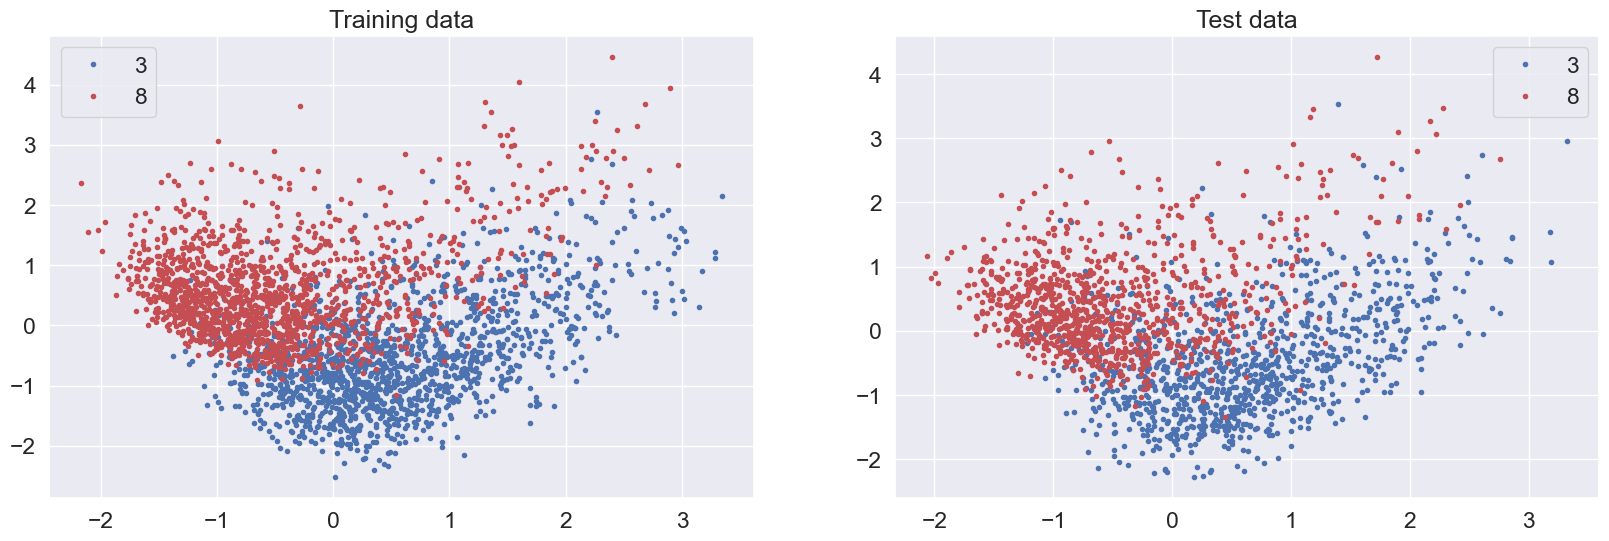

In [3]:
# pick out 3000 data points since too many data points makes it difficult to see what is going on 
points = np.arange(3000, 6000)
data = np.load("data.npy", allow_pickle=True).item()
X_train = data['X_train'][points]; X_test = data['X_train'][np.arange(9000, 11000)]; y_train = data['t_train'][points]; y_test = data['t_train'][np.arange(9000, 11000)]

# reduce dimensionality to 2D using PCA 
def prep_PCA(X, dim=2):
    # reduce dimensionality to 2D using principal component analysis (PCA)
    _, s, V = np.linalg.svd(X)

    # get eigenvectors corresponding to the two largest eigenvalues
    eigen_vecs = V[:dim, :]
    eigen_vals = s[:dim]

    # set-up projection matrix
    Pmat = eigen_vecs.T*(np.sqrt(len(X))/eigen_vals)
    
    return Pmat

# project to 2D using PCA
Pmat = prep_PCA(X_train)
Z_train = X_train @ Pmat
Z_test = X_test @ Pmat

# Z_train = Z_train[:500]
# y_train = y_train[:500]


# plot
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(Z_train[y_train==0, 0], Z_train[y_train==0, 1], 'b.', label = "3")
ax[0].plot(Z_train[y_train==1, 0], Z_train[y_train==1, 1], 'r.', label = "8")
ax[0].set_title("Training data")
ax[1].plot(Z_test[y_test==0, 0], Z_test[y_test==0, 1], 'b.', label = "3")
ax[1].plot(Z_test[y_test==1, 0], Z_test[y_test==1, 1], 'r.', label = "8")
ax[1].set_title("Test data")

[a.legend() for a in ax]
plt.show()

### Plot Weight Trace 

In [4]:
# # initialize parameters 
# num_points = 150

# regressor = LogisticRegression(lam = lam, sigma = sigma, add_bias=False)
# regressor.fit(Z_train[:num_points], y_train[:num_points])
# print(f"Found parameters = {regressor.w}")
# print(f"Accuracy = {regressor.accuracy(Z_train, y_train):2.5f}")


# Z_subset = Z_train[:num_points]
# y_subset = y_train[:num_points]

# mask = y_subset == 1
# y_ = np.append(y_subset[mask], y_subset[~mask])
# Z_ = np.r_[Z_subset[mask], Z_subset[~mask]]

# plot_weight_trace(Z_subset, y_subset, eps, delta, sigma, lam, gamma, regressor, 65) # np.sum(mask) 

## Other data 

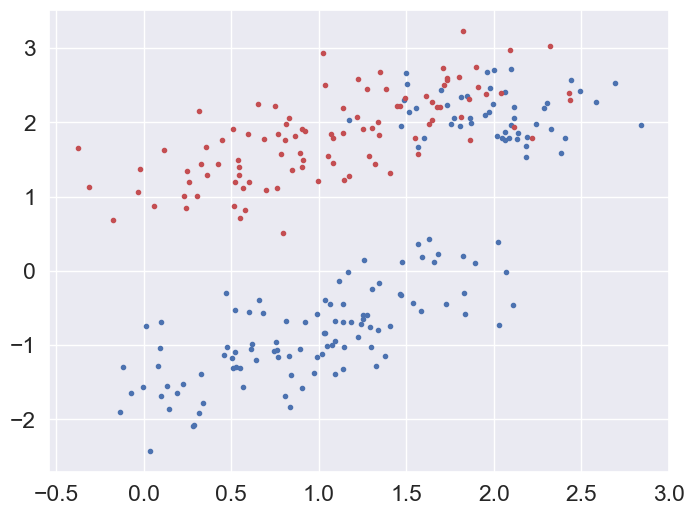

In [12]:
%matplotlib inline 
# c1 = np.random.multivariate_normal(mean = [-0.5, 1.5], cov = [[0.5, 0.3], [0.3, 0.2]], size = 100)
# c2 = np.random.multivariate_normal(mean = [0.5, -0.5], cov = [[0.5, 0.3], [0.3, 0.2]], size = 100)
# c1 = np.random.multivariate_normal(mean = [-0.5, 0.5], cov = [[0.5, 0.3], [0.3, 0.2]], size = 100)
# c2 = np.random.multivariate_normal(mean = [0.5, -0.5], cov = [[0.6, 0.5], [0.5, 0.2]], size = 100)

c1_1 = np.random.multivariate_normal(mean = [1.0, -0.8], cov = [[0.4, 0.3], [0.3, 0.4]], size = 100)
c1_2 = np.random.multivariate_normal(mean = [2.0, 2.0], cov = [[0.1, 0.0], [0.0, 0.1]], size = 50)
c2 = np.random.multivariate_normal(mean = [1.0, 1.7], cov = [[0.4, 0.3], [0.3, 0.4]], size = 100)
c1 = np.r_[c1_2, c1_1]


fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ax.plot(c1[:, 0], c1[:, 1], 'b.')
ax.plot(c2[:, 0], c2[:, 1], 'r.')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


Retraining. beta = 0.25, budget = 0.23
Retraining. beta = 0.32, budget = 0.23
Retraining. beta = 0.38, budget = 0.23
Retraining. beta = 0.44, budget = 0.23
Retraining. beta = 0.48, budget = 0.23
Retraining. beta = 0.51, budget = 0.23
Retraining. beta = 0.56, budget = 0.23
Retraining. beta = 0.59, budget = 0.23
Retraining. beta = 0.61, budget = 0.23
Retraining. beta = 0.63, budget = 0.23
Retraining. beta = 0.65, budget = 0.23
Retraining. beta = 0.70, budget = 0.23
Retraining. beta = 0.74, budget = 0.23
Retraining. beta = 0.76, budget = 0.23
Retraining. beta = 0.77, budget = 0.23
Retraining. beta = 0.79, budget = 0.23
Retraining. beta = 0.83, budget = 0.23
Retraining. beta = 0.89, budget = 0.23
Retraining. beta = 0.91, budget = 0.23
Retraining. beta = 0.98, budget = 0.23
Retraining. beta = 0.98, budget = 0.23
Retraining. beta = 1.00, budget = 0.23
Retraining. beta = 1.04, budget = 0.23
Retraining. beta = 1.05, budget = 0.23
Retraining. beta = 1.09, budget = 0.23
Retraining. beta = 1.08, 

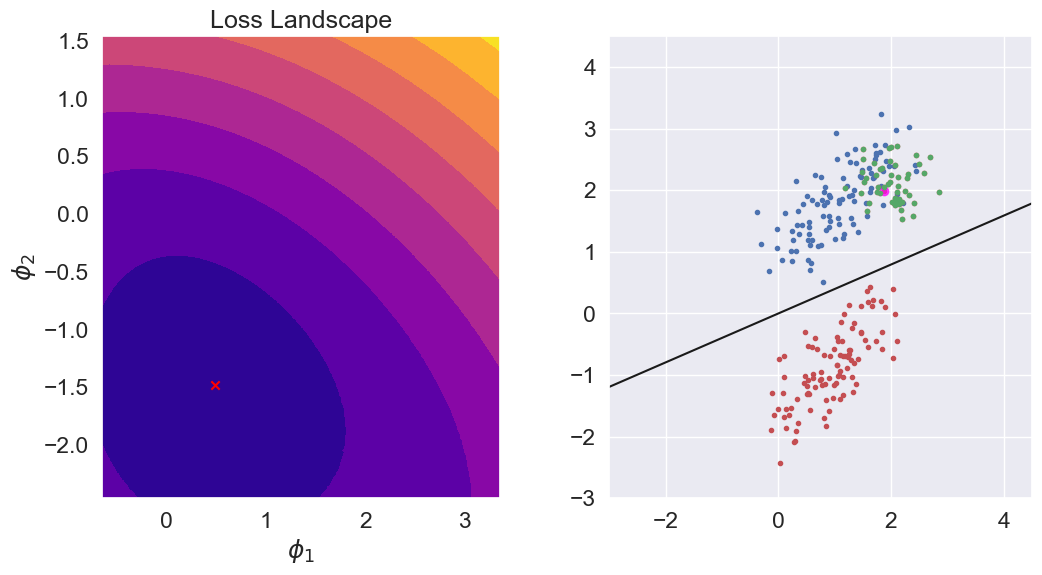

In [15]:
# initialize parameters 
Z = np.r_[c1, c2]
y = np.append(np.ones((1, 150)), np.zeros((1, 100)))

# p = np.random.permutation(Z.shape[0])
# Z = Z[p]
# y = y[p]
regressor = LogisticRegression(lam = lam, sigma = sigma, add_bias = False)
regressor.fit(Z, y)

plot_weight_trace(Z, y, eps, delta, sigma, lam, gamma, regressor, 50) 

### Plot according to their norm 

In [16]:
from tqdm import tqdm 
from removal_algorithm import loss_derivative, loss_derivative_2

removal_norm = np.zeros((Z.shape[0], 1))

for i in tqdm(range(Z.shape[0])):
    Z_ = np.r_[Z[:i], Z[i+1:]]
    y_ = np.r_[y[:i], y[i+1:]]

    Delta = loss_derivative(Z[i], y[i], regressor.w) + lam * regressor.w 
    H = loss_derivative_2(Z_, y_, regressor.w, lam)
    H_delta = np.linalg.inv(H) @ Delta

    removal_norm[i] = np.linalg.norm(H_delta)


100%|██████████| 250/250 [00:00<00:00, 1870.34it/s]


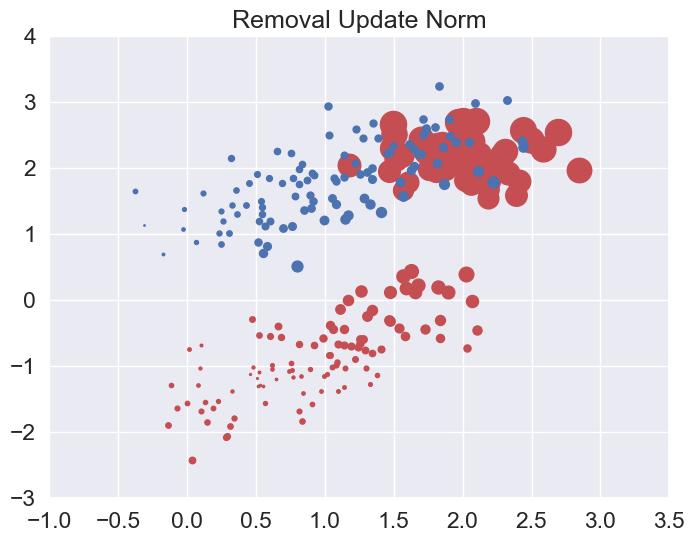

In [24]:
removal_norm = removal_norm / removal_norm.min()
plt.figure(figsize = (8, 6))
for i in range(Z.shape[0]):
    color = "b" if y[i] == 0 else "r"
    plt.scatter(Z[i, 0], Z[i, 1], s = removal_norm[i], color = color)
plt.title("Removal Update Norm")
plt.xlim([-1, 3.5])
plt.ylim([-3, 4])
plt.savefig("Results/trace1.png")
plt.show()
